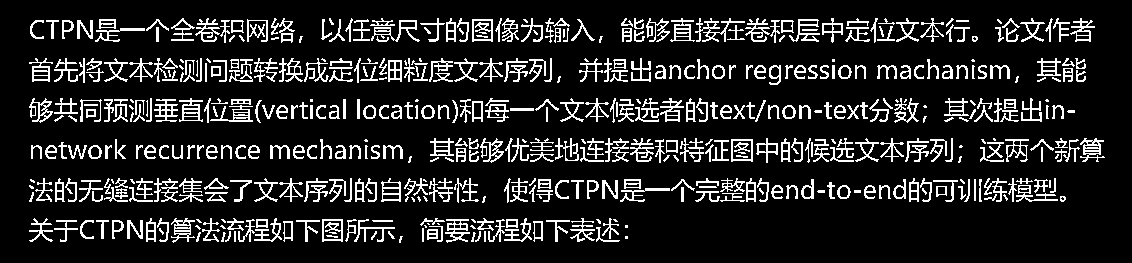

[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0  18105  44115
  91800 101745  88230  99960  94605  74970  67575  93330 109140  78795
  97155  86190  82365  83640  72930  66810  77010  65790  65025  99450
 114495  57885   3570      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0  17595  38250
  50235  64005  81600  89250  56100  79050 110160 104040  88995  76755
  85935  98430  89760  77520  77775  81855  82620  91800  87465  71400
  85170  45900   3315   2550   2040      0      0      0      0      0
      0      0      0      0      0      0      0      0  12240  44880
  68595  57885  62730  72420  71655  96900 106845  86190  91545  99450
  97665  93585  91545  77775  74970  84915  84150  93585  85425  55080
  83130  49980   3315      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0  15555  46665
  5992

58 82


98 122


138 162


178 202


219 242


In [53]:
import os
import cv2
import numpy as np
from IPython.display import display
from PIL import Image



def extract_peek(array_vals, minimun_val, minimun_range):
    start_i = None
    end_i = None
    peek_ranges = []
    for i, val in enumerate(array_vals):
        if val > minimun_val and start_i is None:
            start_i = i
        elif val > minimun_val and start_i is not None:
            pass
        elif val < minimun_val and start_i is not None:
            if i - start_i >= minimun_range:
                end_i = i
                peek_ranges.append((start_i, end_i))
                start_i = None
                end_i = None
        elif val < minimun_val and start_i is None:
            pass
        else:
            raise ValueError("cannot parse this case...")
    return peek_ranges


def img_text_cut(img_path, min_val=10000, min_range=10):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    adaptive_threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                               cv2.THRESH_BINARY_INV, 11, 2)
    
    display(Image.fromarray(adaptive_threshold))
    
    horizontal_sum = np.sum(adaptive_threshold, axis=1)
    print(horizontal_sum)
    
    peek_ranges = extract_peek(horizontal_sum, min_val, min_range)
    
    for y0, y1 in peek_ranges:
        print(y0, y1)
        display(Image.fromarray(img[y0:y1, ]))
        
img_text_cut('1.jpg', 10000, 5)

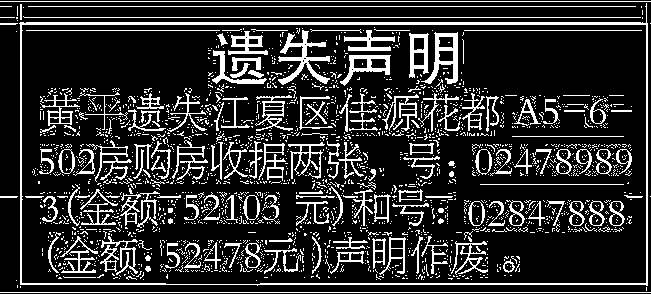

[     0 166005      0    255    765    765 159630   1530   1020   1020
   1275   1275   1275   1275   1275   1020   1020 162690   1530    765
    510    255 158355 165240 164220   1020   1020   1275   2295   4590
 132855   7905  10200  13770  18870  20655  27030  33915  31110  26010
  26265  15045  16065  22695  26520  26520  24735  24480  24735  25500
  29070  25755  24735  21930  11730  20910  20910  33150  38505  31620
  32130  19635  19125  22950  20145  19635  19380  20400  28050  23460
  23715  21420  23460  22185  24480  21930  21675  19380  19890  30345
  27795  26520  21675  18360   6120   6885  11220  14535  16065  20655
  13005  14790  12495   8925  14790  36720  35700  47430  46410  43350
  34680  29580  39525  37740  40035  33405  46665  36720  36975  31875
  47940  57885  39525  37485  48195  36975  30855  36975  33915  37485
  42075  38250  29835  43350  29070  25500  40035  44880  34680  40035
  27030  14025  13515  22695  36720  30090  41820  17085  11475   9690
  1198

17 27


30 84


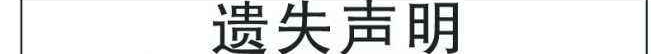

86 141


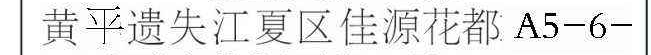

142 187


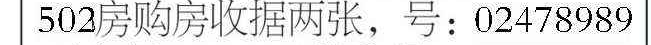

190 226


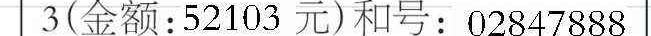

227 279


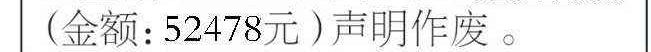

283 293


In [61]:
img_text_cut('10.jpg', 8000, 10)